# Notebook Cleaning

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

C:\Users\semde\AppData\Local\Temp\ipykernel_20716\712048457.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
url = r"..\data\raw\raw_huis_te_koop.csv"
house = pd.read_csv(url, sep=",")
url = r"..\data\raw\raw_apartement_te_koop.csv"
app = pd.read_csv(url, sep=",")

### Remove duplicates

In [4]:
def removedup_id(df):
    dup = df.duplicated(subset=["property_id"]).sum()
    print(dup)
    df.drop_duplicates(subset=["property_id"],keep="first", inplace=True)
    dup = df.duplicated(subset=["property_id"]).sum()
    print(dup)
    

In [5]:
removedup_id(house)
removedup_id(app)

2239
0
122
0


### drop streetname and nr

In [6]:
def remove_street_nr(df):
    df.drop(["street_name", "house_number"], axis="columns", inplace= True)
    return df


In [7]:
remove_street_nr(house)
remove_street_nr(app)

,property_id,locality_name,postal_code,latitude,longitude,property_type,property_subtype,price,type_of_sale,number_of_rooms,...,furnished,open_fire,terrace,terrace_area,garden,garden_area,surface_of_good,number_of_facades,swimming_pool,state_of_building
0,11151864,Turnhout,2300,51.316287,4.932205,HOUSE,HOUSE,175000.0,BUY_REGULAR,NaN,...,NaN,1,1.0,NaN,1.0,NaN,227.0,3.0,NaN,TO_RENOVATE
1,11154023,Beringen,3582,51.065132,5.227231,HOUSE,HOUSE,249000.0,BUY_REGULAR,1.0,...,NaN,0,NaN,NaN,NaN,NaN,1186.0,4.0,NaN,TO_BE_DONE_UP
2,11141961,SAINT-JOSSE-TEN-NOODE,1210,NaN,NaN,APARTMENT,FLAT_STUDIO,120000.0,BUY_REGULAR,NaN,...,NaN,0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,TO_BE_DONE_UP
3,11150522,Gavere,9890,50.914593,3.650555,HOUSE_GROUP,HOUSE_GROUP,NaN,BUY_REGULAR,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11145864,Comblain-Fairon,4180,50.446027,5.542826,HOUSE,HOUSE,499000.0,BUY_REGULAR,21.0,...,NaN,0,NaN,NaN,NaN,NaN,1323.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16571,10795049,Aalter,9880,51.087235,3.448468,APARTMENT,APARTMENT,378000.0,BUY_REGULAR,10.0,...,NaN,0,1.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN
16572,11089010,Woluwe-Saint-Lambert,1200,50.840846,4.421270,APARTMENT,DUPLEX,335000.0,BUY_REGULAR,NaN,...,0.0,0,1.0,31.0,NaN,NaN,NaN,2.0,NaN,GOOD
16573,11150113,Boutersem,3370,50.831096,4.829753,HOUSE,VILLA,499000.0,BUY_REGULAR,NaN,...,0.0,0,1.0,NaN,NaN,NaN,1528.0,4.0,NaN,JUST_RENOVATED
16574,11153256,Laeken,1020,50.874875,4.339214,APARTMENT,APARTMENT,208000.0,BUY_REGULAR,NaN,...,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GOOD


### Remove app in house and house in app

In [8]:
house.groupby("property_type").count()
app.groupby("property_type").count()

,property_id,locality_name,postal_code,latitude,longitude,property_subtype,price,type_of_sale,number_of_rooms,living_area,...,furnished,open_fire,terrace,terrace_area,garden,garden_area,surface_of_good,number_of_facades,swimming_pool,state_of_building
property_type,,,,,,,,,,,,,,,,,,,,,
APARTMENT,9980,9980,9980,8874,8874,9980,9980,9980,3015,9663,...,4045,9980,6834,5330,805,635,0,6304,3893,7593
APARTMENT_GROUP,1178,1178,1178,1043,1043,1178,0,1178,0,0,...,30,1178,0,0,0,0,0,0,0,0
HOUSE,5185,5185,5185,4245,4245,5185,5185,5185,1327,4701,...,1560,5185,2697,1231,1921,1428,5185,4240,1306,3838
HOUSE_GROUP,111,111,111,93,93,111,0,111,0,0,...,1,111,0,0,0,0,0,0,0,0


In [9]:
## ~ this symbol means that all the things like house and house_group are exclude out of the new dataframe
def remove_house_in_app(df):
    df = df[~df["property_type"].isin(["HOUSE", "HOUSE_GROUP"])]
    return df


In [10]:
def remove_app_in_house(df):
    df = df[df["property_type"].isin(["HOUSE", "HOUSE_GROUP"])]
    return df

In [11]:
house = remove_app_in_house(house)
app = remove_house_in_app(app)


### Strip all the columns

In [12]:
def strip_all_columns(df):
    cl = []
    for columns in df:
        cl.append(columns)
    return cl

In [13]:
def strip(df):
    cl = strip_all_columns(df)
    for column_name in cl:
        if df[column_name].dtype == 'object':  # Check if the column contains object (string) values
            df.loc[:, column_name] = df[column_name].str.strip()
    return df

In [14]:
house = strip(house)
app = strip(app)

### Dataframe Info

In [15]:
house.info()
app.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13904 entries, 0 to 19970
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   property_id             13904 non-null  int64  
 1   locality_name           13904 non-null  object 
 2   postal_code             13904 non-null  object 
 3   latitude                12034 non-null  float64
 4   longitude               12034 non-null  float64
 5   property_type           13904 non-null  object 
 6   property_subtype        13904 non-null  object 
 7   price                   13302 non-null  float64
 8   type_of_sale            13904 non-null  object 
 9   number_of_rooms         3962 non-null   float64
 10  living_area             12492 non-null  float64
 11  kitchen_type            8391 non-null   object 
 12  fully_equipped_kitchen  10193 non-null  float64
 13  furnished               4589 non-null   float64
 14  open_fire               13904 non-null  int

In [16]:
house.groupby("property_type").count()


,property_id,locality_name,postal_code,latitude,longitude,property_subtype,price,type_of_sale,number_of_rooms,living_area,...,furnished,open_fire,terrace,terrace_area,garden,garden_area,surface_of_good,number_of_facades,swimming_pool,state_of_building
property_type,,,,,,,,,,,,,,,,,,,,,
HOUSE,13302,13302,13302,11473,11473,13302,13302,13302,3962,12492,...,4574,13302,7598,3880,5192,4349,13302,11156,4522,10515
HOUSE_GROUP,602,602,602,561,561,602,0,602,0,0,...,15,602,0,0,0,0,0,0,0,0


In [17]:
app.groupby("property_type").count()

,property_id,locality_name,postal_code,latitude,longitude,property_subtype,price,type_of_sale,number_of_rooms,living_area,...,furnished,open_fire,terrace,terrace_area,garden,garden_area,surface_of_good,number_of_facades,swimming_pool,state_of_building
property_type,,,,,,,,,,,,,,,,,,,,,
APARTMENT,9980,9980,9980,8874,8874,9980,9980,9980,3015,9663,...,4045,9980,6834,5330,805,635,0,6304,3893,7593
APARTMENT_GROUP,1178,1178,1178,1043,1043,1178,0,1178,0,0,...,30,1178,0,0,0,0,0,0,0,0


# Notebook Data Analytics

### Data Info

In [18]:
Cleanurl = r"..\data\cleaned\clean_app.csv"
app = pd.read_csv(Cleanurl, sep=",")
Cleanurl = r"..\data\cleaned\clean_house.csv"
house = pd.read_csv(Cleanurl, sep=",")

In [19]:
house.head(10)
house.columns

Index(['property_id', 'locality_name', 'postal_code', 'latitude', 'longitude',
       'property_type', 'property_subtype', 'price', 'type_of_sale',
       'number_of_rooms', 'living_area', 'kitchen_type',
       'fully_equipped_kitchen', 'furnished', 'open_fire', 'terrace',
       'terrace_area', 'garden', 'garden_area', 'surface_of_good',
       'number_of_facades', 'swimming_pool', 'state_of_building', 'main_city',
       'province'],
      dtype='object')

In [20]:
app.head(10)

,property_id,locality_name,postal_code,latitude,longitude,property_type,property_subtype,price,type_of_sale,number_of_rooms,...,terrace,terrace_area,garden,garden_area,surface_of_good,number_of_facades,swimming_pool,state_of_building,main_city,province
0,11141961,sint-joost-ten-node,1210,NaN,NaN,APARTMENT,FLAT_STUDIO,120000.0,BUY_REGULAR,NaN,...,1.0,6.0,NaN,NaN,NaN,NaN,NaN,TO_BE_DONE_UP,sint-joost-ten-node,brussel
1,11158977,elsene,1050,50.832733,4.364130,APARTMENT,APARTMENT,325000.0,BUY_REGULAR,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,0.0,AS_NEW,elsene,brussel
2,11072105,brussel,1040,50.843509,4.370263,APARTMENT,APARTMENT,650000.0,BUY_REGULAR,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,0.0,AS_NEW,etterbeek,brussel
3,11129303,de haan,8420,51.257157,2.999425,APARTMENT,APARTMENT,119000.0,BUY_REGULAR,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GOOD,de haan,west-vlaanderen
4,11155131,vorselaar,2290,51.202692,4.768350,APARTMENT,APARTMENT,249000.0,BUY_REGULAR,NaN,...,1.0,NaN,NaN,NaN,NaN,3.0,NaN,GOOD,vorselaar,antwerpen
5,11142564,waver,1300,50.721307,4.625271,APARTMENT,DUPLEX,135000.0,BUY_REGULAR,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,TO_BE_DONE_UP,wavre,waals-brabant
6,11093958,nijvel,1400,50.599522,4.333127,APARTMENT,GROUND_FLOOR,165000.0,BUY_REGULAR,NaN,...,1.0,10.0,NaN,NaN,NaN,NaN,0.0,GOOD,nivelles,waals-brabant
7,10985322,brussel,1000,50.847441,4.347515,APARTMENT,APARTMENT,415000.0,BUY_REGULAR,NaN,...,NaN,NaN,1.0,45.0,NaN,NaN,NaN,AS_NEW,brussel,brussel
8,10978765,knokke,8300,51.351968,3.288690,APARTMENT,APARTMENT,319000.0,BUY_REGULAR,5.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,knokke-heist,west-vlaanderen
9,11100255,knokke-zoute,8300,51.349627,3.284821,APARTMENT,APARTMENT,675000.0,BUY_REGULAR,9.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,knokke-heist,west-vlaanderen


### Price per location

In [21]:
locatie = house[["locality_name", "price"]]

In [22]:
locatie

,locality_name,price
0,ronse,245000.0
1,merelbeke,315000.0
2,forêt,325000.0
3,ganshoren,1149000.0
4,ottignies,395000.0
...,...,...
12392,middelkerke,550000.0
12393,borgworm,499000.0
12394,oudenaarde,393000.0
12395,opwijk,160000.0


In [23]:
priceMean = locatie.groupby("locality_name").mean()

In [24]:
priceMean

,price
locality_name,
's gravenbrakel,2.783333e+05
's gravenwezel,1.385000e+06
aaigem,8.950000e+05
aalbeke,3.176667e+05
aalst,4.200564e+05
...,...
àben-àmael,2.500000e+05
àcaussinnes,5.365000e+05
àghezée,5.950000e+05


In [25]:
locationHead = locatie[locatie["locality_name"].isin(["Gent", "Brugge", "Brussel", "Leuven"])]

In [26]:
locationHead.head(10)

,locality_name,price


<Axes: >

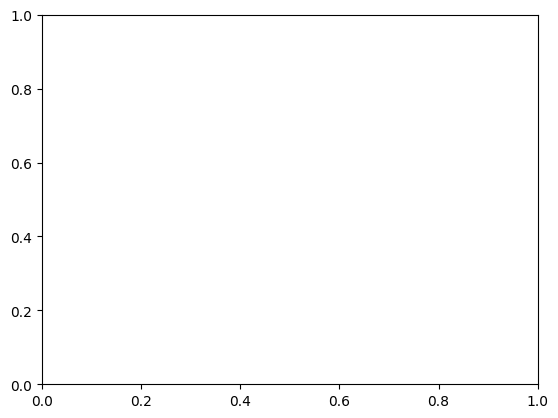

In [27]:
sns.barplot(x="locality_name",
            y="price",
            data=locationHead)


### correlation

In [28]:
house.columns

Index(['property_id', 'locality_name', 'postal_code', 'latitude', 'longitude',
       'property_type', 'property_subtype', 'price', 'type_of_sale',
       'number_of_rooms', 'living_area', 'kitchen_type',
       'fully_equipped_kitchen', 'furnished', 'open_fire', 'terrace',
       'terrace_area', 'garden', 'garden_area', 'surface_of_good',
       'number_of_facades', 'swimming_pool', 'state_of_building', 'main_city',
       'province'],
      dtype='object')

In [29]:
locality_house = house[["locality_name", "price","living_area", "open_fire", "terrace_area", "surface_of_good", "garden_area", "number_of_facades"]]

In [30]:
house.head(10)

,property_id,locality_name,postal_code,latitude,longitude,property_type,property_subtype,price,type_of_sale,number_of_rooms,...,terrace,terrace_area,garden,garden_area,surface_of_good,number_of_facades,swimming_pool,state_of_building,main_city,province
0,11157483,ronse,9600,50.741809,3.607601,HOUSE,HOUSE,245000.0,BUY_REGULAR,NaN,...,1.0,13.0,1.0,161.0,250.0,2.0,0.0,GOOD,ronse,oost-vlaanderen
1,11156843,merelbeke,9820,51.019250,3.760957,HOUSE,HOUSE,315000.0,BUY_REGULAR,NaN,...,1.0,23.0,NaN,NaN,77.0,2.0,NaN,GOOD,merelbeke,oost-vlaanderen
2,11161362,forêt,4870,50.563966,5.675489,HOUSE,HOUSE,325000.0,BUY_REGULAR,NaN,...,1.0,16.0,1.0,420.0,572.0,3.0,NaN,AS_NEW,trooz,luik
3,11160440,ganshoren,1083,50.873909,4.307285,HOUSE,HOUSE,1149000.0,BUY_REGULAR,NaN,...,1.0,30.0,1.0,270.0,400.0,3.0,NaN,AS_NEW,ganshoren,brussel
4,11153591,ottignies,1340,50.671784,4.575929,HOUSE,HOUSE,395000.0,BUY_REGULAR,NaN,...,1.0,37.0,1.0,76.0,165.0,2.0,NaN,GOOD,ottignies-louvain-la-neuve,waals-brabant
5,11128275,antwerpen merksem,2170,51.243743,4.443372,HOUSE,MIXED_USE_BUILDING,399900.0,BUY_REGULAR,NaN,...,NaN,NaN,NaN,NaN,65.0,2.0,0.0,GOOD,antwerpen,antwerpen
6,11157340,hoei,4500,50.524452,5.234238,HOUSE,APARTMENT_BLOCK,300000.0,BUY_REGULAR,NaN,...,1.0,35.0,1.0,300.0,450.0,2.0,0.0,GOOD,huy,luik
7,11159641,luik,4020,50.636057,5.589725,HOUSE,HOUSE,499000.0,BUY_REGULAR,NaN,...,1.0,14.0,1.0,135.0,315.0,2.0,0.0,AS_NEW,liège,luik
8,11156973,marchin,4570,50.482355,5.249561,HOUSE,BUNGALOW,249000.0,BUY_REGULAR,NaN,...,1.0,NaN,1.0,355.0,739.0,4.0,0.0,GOOD,marchin,luik
9,11159253,oupeye,4680,50.708677,5.621946,HOUSE,HOUSE,299000.0,BUY_REGULAR,NaN,...,1.0,25.0,1.0,204.0,381.0,3.0,0.0,TO_BE_DONE_UP,oupeye,luik


### correlation between price and living_area

In [31]:
corr = locality_house["living_area"].corr(locality_house["price"])
round(corr,2)

0.44

### Correlation between price terrace area

In [32]:
corr = locality_house["price"].corr(locality_house["terrace_area"])
round(corr,2)

0.31

### Correlation between terrace area and living area

In [33]:
corr = locality_house["living_area"].corr(locality_house["terrace_area"])
round(corr,2)

0.17

### correlation between all values

In [34]:
nhouse = locality_house[["price","living_area", "open_fire", "terrace_area", "surface_of_good", "garden_area", "number_of_facades"]]

In [35]:
nhouse.corr()

,price,living_area,open_fire,terrace_area,surface_of_good,garden_area,number_of_facades
price,1.000000,0.435088,-0.026283,0.305737,0.134942,0.263107,0.205228
living_area,0.435088,1.000000,0.020413,0.170295,0.114715,0.206898,0.134895
open_fire,-0.026283,0.020413,1.000000,-0.009788,0.013235,0.021870,0.051552
terrace_area,0.305737,0.170295,-0.009788,1.000000,0.147233,0.104912,0.186733
surface_of_good,0.134942,0.114715,0.013235,0.147233,1.000000,0.858494,0.099911
garden_area,0.263107,0.206898,0.021870,0.104912,0.858494,1.000000,0.175073
number_of_facades,0.205228,0.134895,0.051552,0.186733,0.099911,0.175073,1.000000


<Axes: >

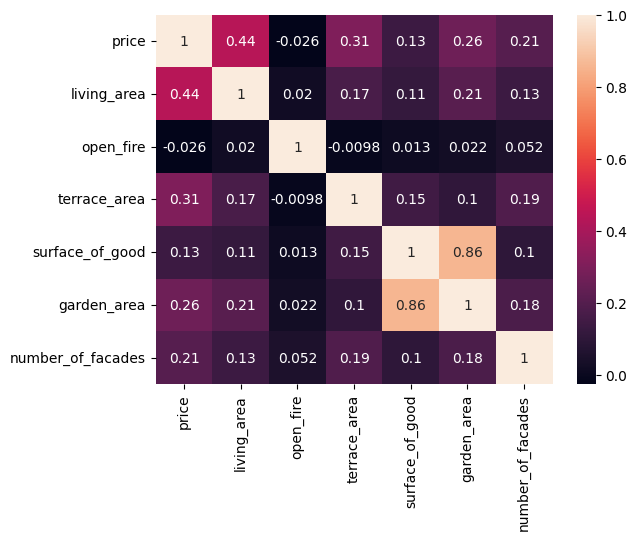

In [36]:
sns.heatmap(nhouse.corr(), annot=True)


### Correlation in gent price and living area

In [37]:
ghouse = locality_house[locality_house["locality_name"] == "Gent"]
ghouse.head(5)

,locality_name,price,living_area,open_fire,terrace_area,surface_of_good,garden_area,number_of_facades


In [38]:
ghouse = ghouse[["price","living_area", "open_fire", "terrace_area", "surface_of_good", "garden_area", "number_of_facades"]]

c:\Users\semde\BeCodeH\PythonProjects\virtualEnvironment\myenvimmo\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\semde\BeCodeH\PythonProjects\virtualEnvironment\myenvimmo\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<Axes: >

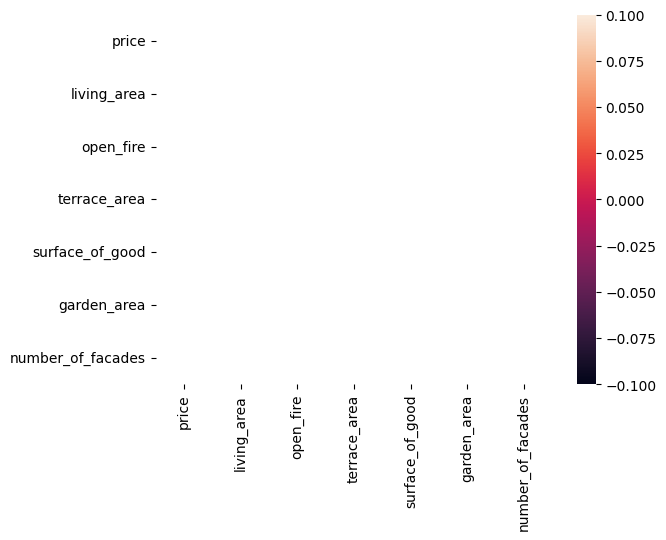

In [39]:
sns.heatmap(ghouse.corr(), annot=True)

<Axes: xlabel='price', ylabel='living_area'>

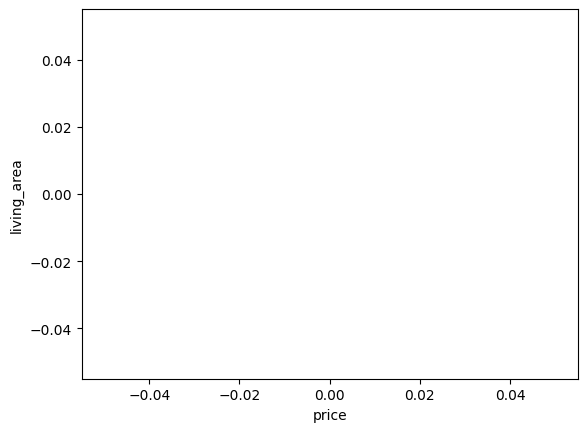

In [40]:
sns.regplot(data = ghouse, x="price", y="living_area", ci=None)


<Axes: xlabel='terrace_area', ylabel='living_area'>

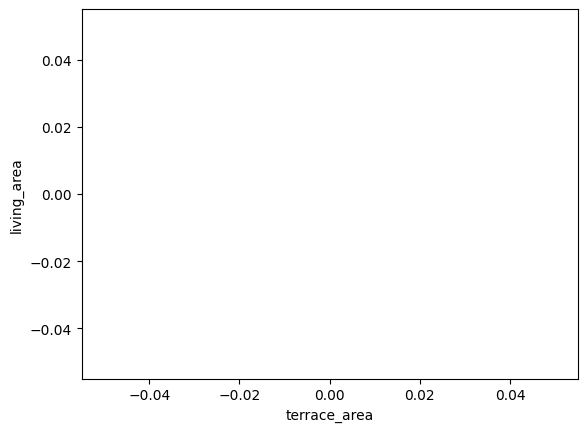

In [41]:
sns.regplot(data = ghouse, x="terrace_area", y="living_area", ci=None)

### Correlation in brussel

In [42]:
bhouse = locality_house[locality_house["locality_name"] == "Brussel"]
bhouse.count()


locality_name        0
price                0
living_area          0
open_fire            0
terrace_area         0
surface_of_good      0
garden_area          0
number_of_facades    0
dtype: int64

In [43]:
bhouse = bhouse[["price","living_area", "terrace_area", "surface_of_good", "garden_area", "number_of_facades"]]
bhouse.head(5)

,price,living_area,terrace_area,surface_of_good,garden_area,number_of_facades


c:\Users\semde\BeCodeH\PythonProjects\virtualEnvironment\myenvimmo\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\semde\BeCodeH\PythonProjects\virtualEnvironment\myenvimmo\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<Axes: >

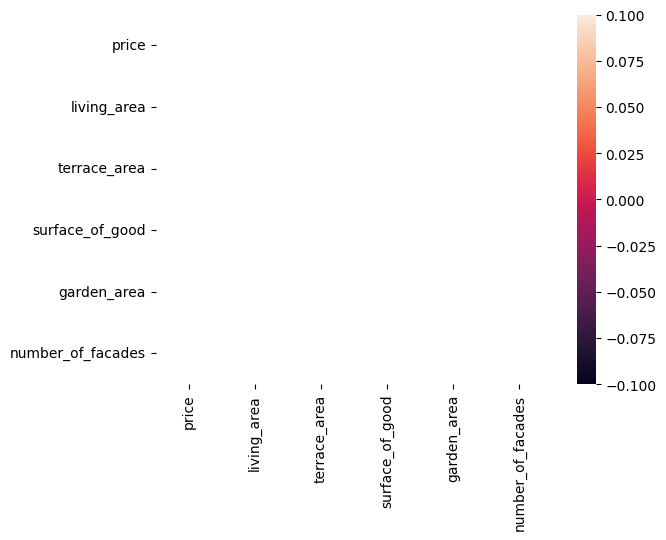

In [44]:
sns.heatmap(bhouse.corr(), annot=True)

<Axes: xlabel='price', ylabel='living_area'>

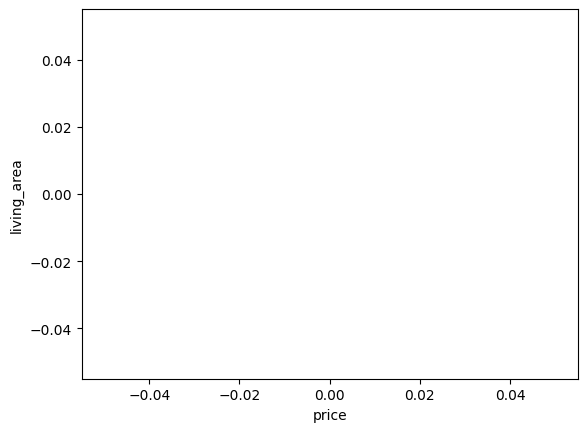

In [45]:
sns.regplot(data = bhouse, x="price", y="living_area", ci=None)

<Axes: xlabel='surface_of_good', ylabel='living_area'>

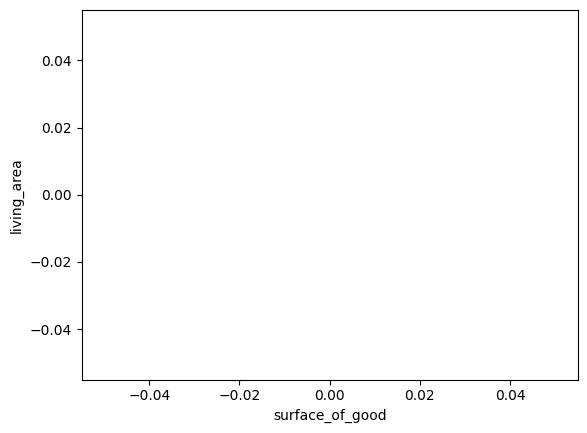

In [46]:
sns.regplot(data = ghouse, x="surface_of_good", y="living_area", ci=None)

<Axes: xlabel='terrace_area', ylabel='living_area'>

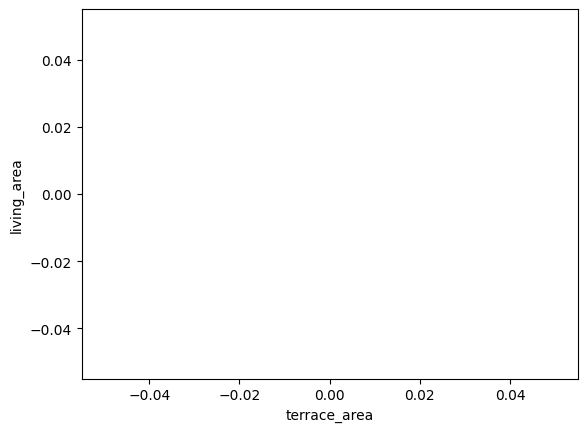

In [47]:
sns.regplot(data = bhouse, x="terrace_area", y="living_area", ci=None)

<Axes: xlabel='surface_of_good', ylabel='garden_area'>

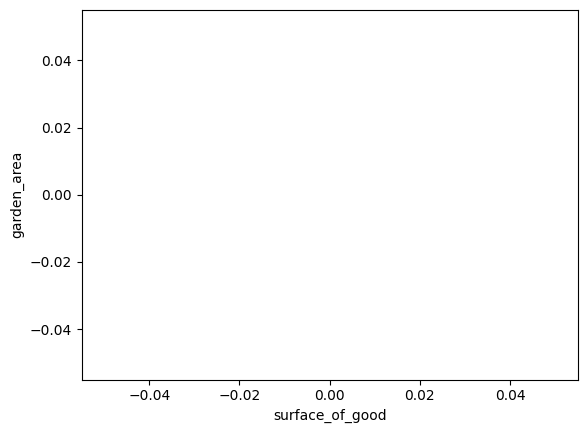

In [48]:
sns.regplot(data = bhouse, x="surface_of_good", y="garden_area", ci=None)

### Correlation of the state of the building

In [49]:
house.head(20)

,property_id,locality_name,postal_code,latitude,longitude,property_type,property_subtype,price,type_of_sale,number_of_rooms,...,terrace,terrace_area,garden,garden_area,surface_of_good,number_of_facades,swimming_pool,state_of_building,main_city,province
0,11157483,ronse,9600,50.741809,3.607601,HOUSE,HOUSE,245000.0,BUY_REGULAR,NaN,...,1.0,13.0,1.0,161.0,250.0,2.0,0.0,GOOD,ronse,oost-vlaanderen
1,11156843,merelbeke,9820,51.019250,3.760957,HOUSE,HOUSE,315000.0,BUY_REGULAR,NaN,...,1.0,23.0,NaN,NaN,77.0,2.0,NaN,GOOD,merelbeke,oost-vlaanderen
2,11161362,forêt,4870,50.563966,5.675489,HOUSE,HOUSE,325000.0,BUY_REGULAR,NaN,...,1.0,16.0,1.0,420.0,572.0,3.0,NaN,AS_NEW,trooz,luik
3,11160440,ganshoren,1083,50.873909,4.307285,HOUSE,HOUSE,1149000.0,BUY_REGULAR,NaN,...,1.0,30.0,1.0,270.0,400.0,3.0,NaN,AS_NEW,ganshoren,brussel
4,11153591,ottignies,1340,50.671784,4.575929,HOUSE,HOUSE,395000.0,BUY_REGULAR,NaN,...,1.0,37.0,1.0,76.0,165.0,2.0,NaN,GOOD,ottignies-louvain-la-neuve,waals-brabant
5,11128275,antwerpen merksem,2170,51.243743,4.443372,HOUSE,MIXED_USE_BUILDING,399900.0,BUY_REGULAR,NaN,...,NaN,NaN,NaN,NaN,65.0,2.0,0.0,GOOD,antwerpen,antwerpen
6,11157340,hoei,4500,50.524452,5.234238,HOUSE,APARTMENT_BLOCK,300000.0,BUY_REGULAR,NaN,...,1.0,35.0,1.0,300.0,450.0,2.0,0.0,GOOD,huy,luik
7,11159641,luik,4020,50.636057,5.589725,HOUSE,HOUSE,499000.0,BUY_REGULAR,NaN,...,1.0,14.0,1.0,135.0,315.0,2.0,0.0,AS_NEW,liège,luik
8,11156973,marchin,4570,50.482355,5.249561,HOUSE,BUNGALOW,249000.0,BUY_REGULAR,NaN,...,1.0,NaN,1.0,355.0,739.0,4.0,0.0,GOOD,marchin,luik
9,11159253,oupeye,4680,50.708677,5.621946,HOUSE,HOUSE,299000.0,BUY_REGULAR,NaN,...,1.0,25.0,1.0,204.0,381.0,3.0,0.0,TO_BE_DONE_UP,oupeye,luik


In [50]:
house.groupby('state_of_building').count()

,property_id,locality_name,postal_code,latitude,longitude,property_type,property_subtype,price,type_of_sale,number_of_rooms,...,open_fire,terrace,terrace_area,garden,garden_area,surface_of_good,number_of_facades,swimming_pool,main_city,province
state_of_building,,,,,,,,,,,,,,,,,,,,,
AS_NEW,1789,1789,1789,1419,1419,1789,1789,1789,1789,305,...,1789,1427,853,945,853,1789,1689,1033,1789,1789
GOOD,4510,4510,4510,3824,3824,4510,4510,4510,4510,1685,...,4510,2723,1373,1849,1581,4510,3864,1433,4510,4510
JUST_RENOVATED,494,494,494,422,422,494,494,494,494,97,...,494,352,224,257,215,494,439,173,494,494
TO_BE_DONE_UP,1193,1193,1193,1045,1045,1193,1193,1193,1193,262,...,1193,688,366,536,445,1193,1044,433,1193,1193
TO_RENOVATE,1791,1791,1791,1591,1591,1791,1791,1791,1791,473,...,1791,817,394,730,573,1791,1518,514,1791,1791
TO_RESTORE,93,93,93,83,83,93,93,93,93,42,...,93,46,22,40,33,93,68,17,93,93


In [51]:
statebuilding = house[["state_of_building", "price","living_area", "open_fire", "terrace_area", "surface_of_good", "garden_area", "number_of_facades"]]


### State of building is New

<Axes: >

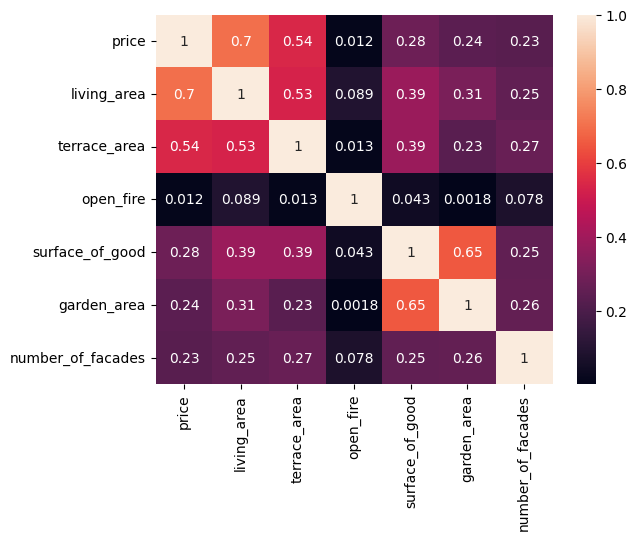

In [52]:
new = statebuilding[statebuilding["state_of_building"]=="AS_NEW"]
new = new[["price", "living_area", "terrace_area", "open_fire", "surface_of_good", "garden_area", "number_of_facades"]]
sns.heatmap(new.corr(), annot=True)

<Axes: xlabel='price', ylabel='living_area'>

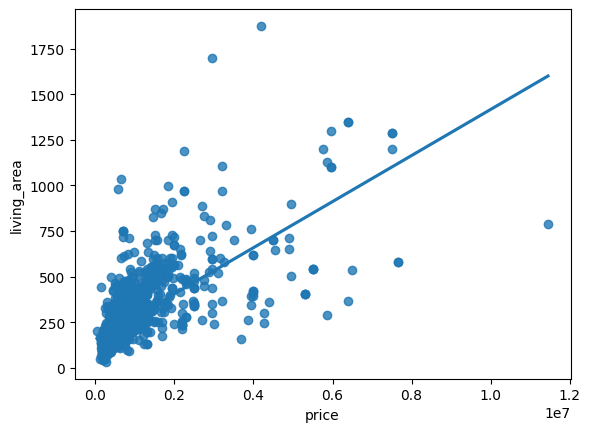

In [53]:
sns.regplot(data = new, x="price", y="living_area", ci=None)

### State of building GOOD

<Axes: >

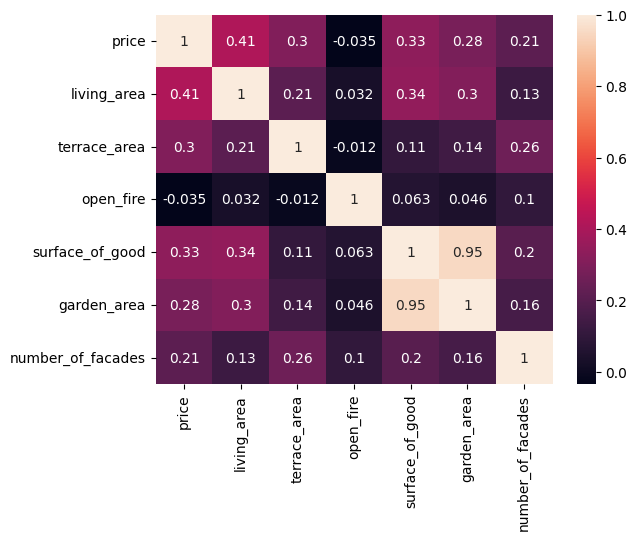

In [54]:
good = statebuilding[statebuilding["state_of_building"]=="GOOD"]
good = good[["price", "living_area", "terrace_area", "open_fire", "surface_of_good", "garden_area", "number_of_facades"]]
sns.heatmap(good.corr(), annot=True)

<Axes: xlabel='price', ylabel='living_area'>

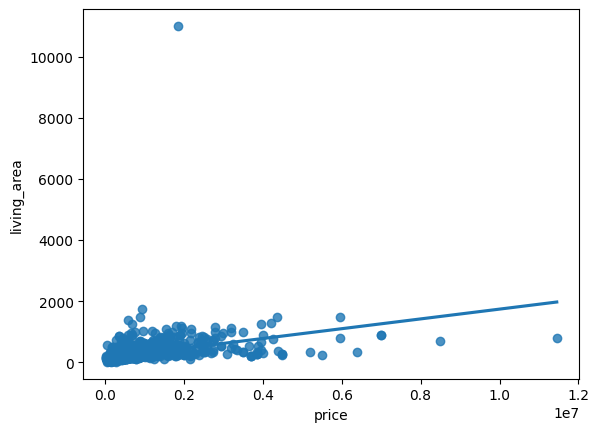

In [55]:
sns.regplot(data = good, x="price", y="living_area", ci=None)

### State of building TO_BE_DONE_UP

<Axes: >

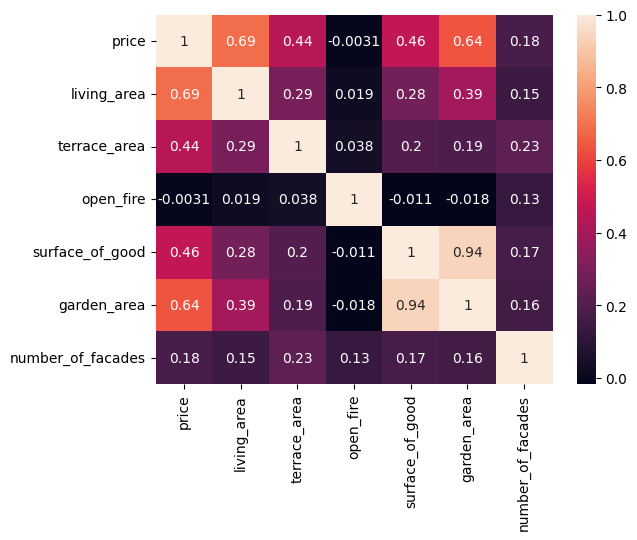

In [56]:
done_up = statebuilding[statebuilding["state_of_building"]=="TO_BE_DONE_UP"]
done_up = done_up[["price", "living_area", "terrace_area", "open_fire", "surface_of_good", "garden_area", "number_of_facades"]]
sns.heatmap(done_up.corr(), annot=True)

<Axes: xlabel='surface_of_good', ylabel='garden_area'>

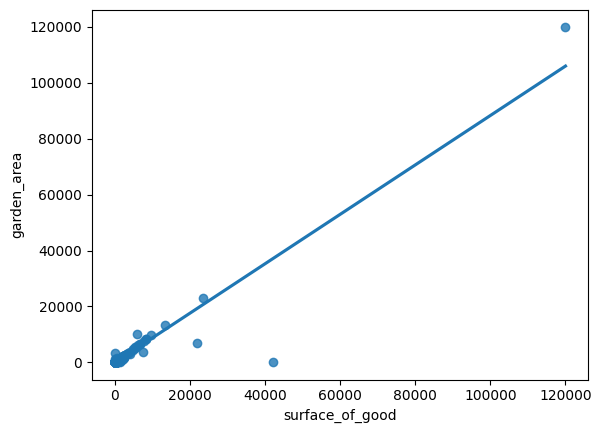

In [57]:
sns.regplot(data = done_up, x="surface_of_good", y="garden_area", ci=None)


# Question for the project

The Question: What is the correlation between the variables and the price? Why do you think some variables are more correlated than others?

Anwser: The price exhibits a significant correlation with the living area, while its correlation with the terrace area is comparatively modest. This discrepancy in correlations can be attributed to the logical influence of price on the living space of a house. Unlike the living area, the price doesn't exert a direct impact on the garden area or the number of rooms. This is due to the variability in room sizes, where larger rooms can be found in both expensive and more affordable houses. Similarly, the number of rooms doesn't necessarily align with price, as less expensive houses may feature more numerous but smaller rooms.

c:\Users\semde\BeCodeH\PythonProjects\virtualEnvironment\myenvimmo\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\semde\BeCodeH\PythonProjects\virtualEnvironment\myenvimmo\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<Axes: >

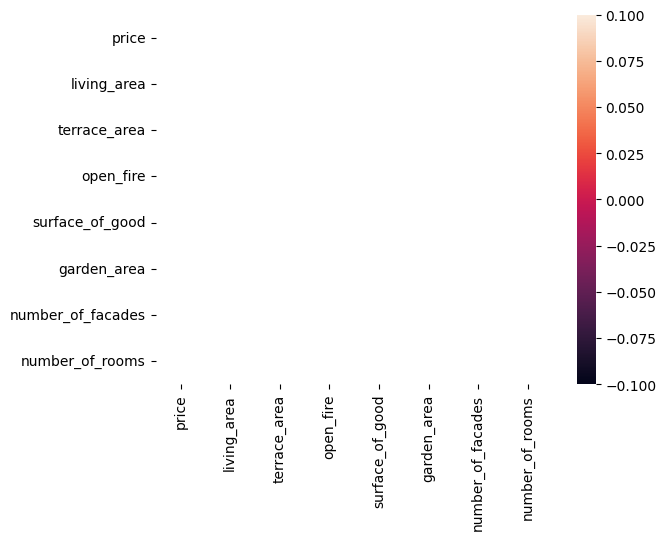

In [58]:
thouse = house[["locality_name","price", "living_area", "terrace_area", "open_fire", "surface_of_good", "garden_area", "number_of_facades", "number_of_rooms"]]
gent_brugge_house = thouse[(thouse["locality_name"] == "Gent") | (thouse["locality_name"] == "Brugge")]
gent_brugge_house = gent_brugge_house[["price", "living_area", "terrace_area", "open_fire", "surface_of_good", "garden_area", "number_of_facades", "number_of_rooms"]]
sns.heatmap(gent_brugge_house.corr(), annot=True)

C:\Users\semde\AppData\Local\Temp\ipykernel_20716\2866983260.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gent_leuven_house = tapp[(thouse["locality_name"] == "Gent") | (thouse["locality_name"] == "Leuven")]
c:\Users\semde\BeCodeH\PythonProjects\virtualEnvironment\myenvimmo\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\semde\BeCodeH\PythonProjects\virtualEnvironment\myenvimmo\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<Axes: >

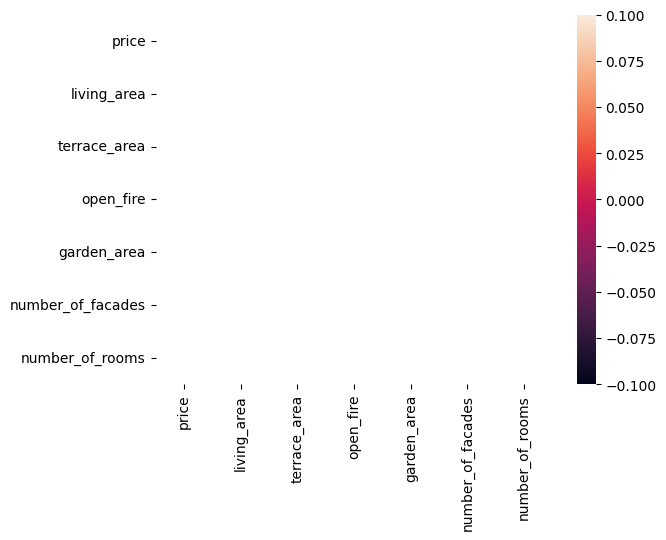

In [59]:
tapp = app[["locality_name","price", "living_area", "terrace_area", "open_fire", "garden_area", "number_of_facades", "number_of_rooms"]]
gent_leuven_house = tapp[(thouse["locality_name"] == "Gent") | (thouse["locality_name"] == "Leuven")]
gent_leuven_house = gent_leuven_house[["price", "living_area", "terrace_area", "open_fire", "garden_area", "number_of_facades", "number_of_rooms"]]
sns.heatmap(gent_leuven_house.corr(), annot=True)
##changes done
##Dit is een test voor sem

## Provincies